## 1. Input Liberies

In [358]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression , Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import recall_score,f1_score,accuracy_score,precision_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import OneHotEncoder,LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro , kstest, normaltest, skew

import warnings
warnings.filterwarnings('ignore')

import pickle
import json

## 2. Problem statement

To predict FISH WEIGHT by using - 
features = ['Species', 'Length1', 'Length2', 'Length3', 'Height',
       'Width']
       &
Target = 'Weight'

## 3. Data Gathering

In [359]:
raw_df = pd.read_csv("Fish.csv")
raw_df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## 4,5,6  EDA (Exploratory Data Analysis), Feature Enginnering & Feature selection

In [360]:
raw_df.isna().sum()  # checked if there are Null or missing values 

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [361]:
raw_df.info()  # checked if any null value is represented by any symbol and what is data type of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [362]:
raw_df['Species'].unique().tolist()

raw_df = pd.get_dummies(raw_df, columns=['Species'])
raw_df

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,1,0
155,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,1,0
156,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,1,0
157,19.7,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,0,1,0


### 1. Linearity

In [363]:
raw_df.corr()

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507,0.326795,-0.186034,-0.033240,0.310641,-0.261784,-0.337109,0.073625
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050,0.216380,-0.205732,-0.037845,0.563514,-0.213250,-0.467420,0.050731
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547,0.233391,-0.205957,-0.036090,0.552780,-0.218048,-0.479775,0.053777
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520,0.327170,-0.198718,-0.105478,0.522894,-0.205072,-0.488397,0.052864
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881,0.772443,-0.000547,-0.191405,-0.101810,-0.202076,-0.491731,0.048951
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000,0.319347,-0.194147,0.144021,0.137722,-0.171465,-0.569018,0.124388
Species_Bream,0.326795,0.216380,0.233391,0.327170,0.772443,0.319347,1.000000,-0.144840,-0.391741,-0.183825,-0.201526,-0.165083,-0.105209
Species_Parkki,-0.186034,-0.205732,-0.205957,-0.198718,-0.000547,-0.194147,-0.144840,1.000000,-0.201021,-0.094329,-0.103413,-0.084712,-0.053988
Species_Perch,-0.033240,-0.037845,-0.036090,-0.105478,-0.191405,0.144021,-0.391741,-0.201021,1.000000,-0.255127,-0.279694,-0.229116,-0.146018
Species_Pike,0.310641,0.563514,0.552780,0.522894,-0.101810,0.137722,-0.183825,-0.094329,-0.255127,1.000000,-0.131247,-0.107513,-0.068519


<AxesSubplot:>

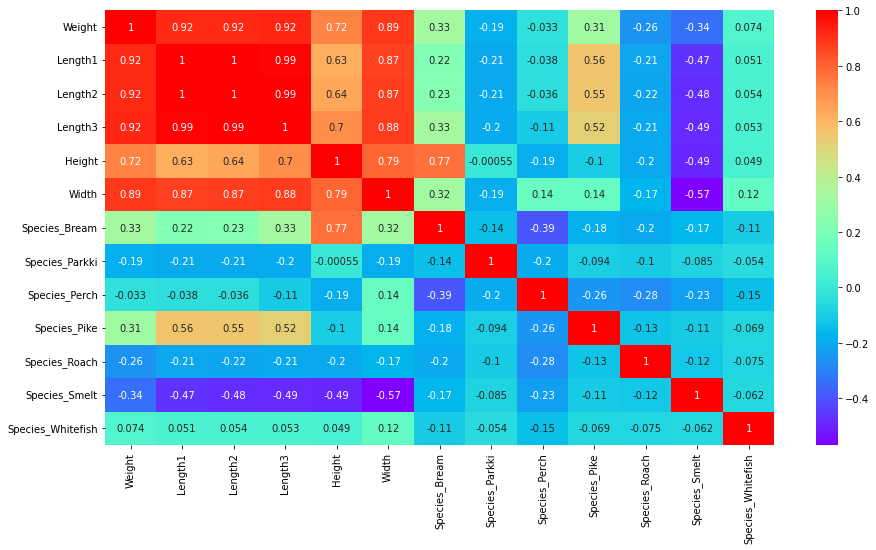

In [364]:
plt.figure(figsize=(15,8))
sns.heatmap(raw_df.corr(),annot = True, cmap = 'rainbow')


### 2. MultiColinearity

In [365]:
raw_df.columns

Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width',
       'Species_Bream', 'Species_Parkki', 'Species_Perch', 'Species_Pike',
       'Species_Roach', 'Species_Smelt', 'Species_Whitefish'],
      dtype='object')

In [366]:
raw_df.to_numpy()

array([[242. ,  23.2,  25.4, ...,   0. ,   0. ,   0. ],
       [290. ,  24. ,  26.3, ...,   0. ,   0. ,   0. ],
       [340. ,  23.9,  26.5, ...,   0. ,   0. ,   0. ],
       ...,
       [ 12.2,  12.1,  13. , ...,   0. ,   1. ,   0. ],
       [ 19.7,  13.2,  14.3, ...,   0. ,   1. ,   0. ],
       [ 19.9,  13.8,  15. , ...,   0. ,   1. ,   0. ]])

<AxesSubplot:>

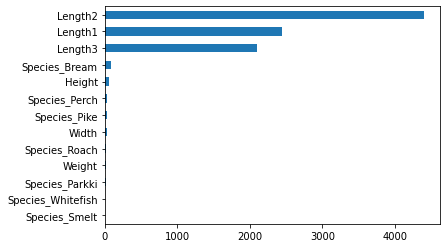

In [367]:
vif_list = []
for i in range(raw_df.shape[1]):
    vif = variance_inflation_factor(raw_df.to_numpy(),i)
    vif_list.append(vif)
        
s1 = pd.Series(vif_list, index =raw_df.columns)     # converted into series
s1.sort_values().plot(kind = 'barh')

## Train test split

In [368]:
x = raw_df.drop('Weight', axis = 1)
y = raw_df['Weight']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 20)

print(x_train.shape)
print(x_test.shape)

(127, 12)
(32, 12)


# Model Training

## 1] Linear Regression algorithm

In [369]:
Linear_reg_woot = LinearRegression()
Linear_reg_woot.fit(x_train, y_train)

LinearRegression()

#### Model evaluation

In [370]:
# Evaluation on test data with Linear_reg

y_pred = Linear_reg_woot.predict(x_test)

mse = mean_squared_error(y_test , y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_test , y_pred)
print("MAE:", mae)

r2 = r2_score(y_test , y_pred)
print("R_squared", r2)

MSE: 10641.346482529983
RMSE: 103.1569022534604
MAE: 76.334073462639
R_squared 0.9241345503088414


In [371]:
# Evaluation on training data Linear_reg

y_pred_train = Linear_reg_woot.predict(x_train)

mse = mean_squared_error(y_train , y_pred_train)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_train , y_pred_train)
print("MAE:", mae)

r2 = r2_score(y_train , y_pred_train)
print("R_squared", r2)

MSE: 7657.374223249367
RMSE: 87.50642389704522
MAE: 63.392048561968075
R_squared 0.9382732908398195


# 3 Decision Tree

In [372]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [373]:
# Evaluation on training data with DT

y_pred_train = dt_reg.predict(x_train)

mse = mean_squared_error(y_train , y_pred_train)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_train , y_pred_train)
print("MAE:", mae)

r2 = r2_score(y_train , y_pred_train)
print("R_squared", r2)

MSE: 0.0
RMSE: 0.0
MAE: 0.0
R_squared 1.0


In [374]:
# Evaluation on test data with DT

y_pred = dt_reg.predict(x_test)

mse = mean_squared_error(y_test , y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_test , y_pred)
print("MAE:", mae)

r2 = r2_score(y_test , y_pred)
print("R_squared", r2)

MSE: 8038.999375
RMSE: 89.6604671803577
MAE: 58.65625
R_squared 0.9426874875606608


In [375]:
# Plot tree
# plt.figure(figsize = (200,150))
# plot_tree(dt_reg, feature_names=x.columns, class_names=['0','1'], filled=True)
# plt.savefig("Decision tree wthout HP")

In [376]:
dt_reg.feature_importances_

array([2.66301715e-03, 9.80327235e-03, 2.10613707e-01, 6.76546336e-03,
       7.67480054e-01, 1.69638339e-03, 9.17185918e-06, 6.15235438e-04,
       1.20609419e-04, 2.24961529e-04, 0.00000000e+00, 8.12455346e-06])

In [377]:
dt_reg.get_depth()

11

### Descision Tree Hyperparameter Tuning 

In [378]:
hyperparameters ={ "criterion" :['mse','mae'],
     'max_depth': np.arange(3,14),
     'min_samples_split' : np.arange(2,20),
     'min_samples_leaf':np.arange(2,15)}

gscv_dt_reg = GridSearchCV(dt_reg,hyperparameters, cv = 5)
gscv_dt_reg.fit(x_train, y_train)
dt_reg_HP= gscv_dt_reg.best_estimator_
dt_reg_HP.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, min_samples_leaf=2,
                      min_samples_split=3)

In [379]:
# Evaluation on training data DT with HP

y_pred_train = dt_reg_HP.predict(x_train)

mse = mean_squared_error(y_train , y_pred_train)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_train , y_pred_train)
print("MAE:", mae)

r2 = r2_score(y_train , y_pred_train)
print("R_squared", r2)

MSE: 1031.8998884514435
RMSE: 32.1231986024344
MAE: 14.986351706036743
R_squared 0.9916817720487695


In [380]:
# Evaluation on test data DT with HP

y_pred = dt_reg_HP.predict(x_test)

mse = mean_squared_error(y_test , y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_test , y_pred)
print("MAE:", mae)

r2 = r2_score(y_test , y_pred)
print("R_squared", r2)

MSE: 6605.352925347224
RMSE: 81.27332234717136
MAE: 54.13385416666667
R_squared 0.9529083964258688


In [381]:
# plt.figure(figsize=(200,150))
# plot_tree(dt_reg_HP,feature_names=x.columns, class_names=['0','1'],filled=True)
# plt.savefig('DT_Regression_HYP.png')

# 4. Random Forest

In [382]:
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

# Evaluation on training data with random forest

y_pred_train = rf_reg.predict(x_train)

mse = mean_squared_error(y_train , y_pred_train)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_train , y_pred_train)
print("MAE:", mae)

r2 = r2_score(y_train , y_pred_train)
print("R_squared", r2)

MSE: 756.2197989212598
RMSE: 27.499450883995117
MAE: 14.420055118110236
R_squared 0.9939040514113238


In [383]:
# Evaluation on test data with  random forest

y_pred = rf_reg.predict(x_test)

mse = mean_squared_error(y_test , y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_test , y_pred)
print("MAE:", mae)

r2 = r2_score(y_test , y_pred)
print("R_squared", r2)

MSE: 3861.7995359374986
RMSE: 62.14337885839085
MAE: 39.6165
R_squared 0.972468036926343


### Random Forest Hyperparameter Tunning

In [384]:
hyperparameters = { "n_estimators": np.arange(90,120),
                   'criterion': ['mse', 'mae'], 
                   'max_depth': np.arange(3,8),
                   'min_samples_leaf':np.arange(3,8),
                   'random_state':[11]}

rscv_rf_reg = RandomizedSearchCV(rf_reg, hyperparameters, cv= 5)
rscv_rf_reg.fit(x_train, y_train)
rscv_rf_reg.best_estimator_
rf_reg_HP = rscv_rf_reg.best_estimator_
rf_reg_HP.fit(x_train, y_train)

RandomForestRegressor(criterion='mse', max_depth=7, min_samples_leaf=3,
                      n_estimators=115, random_state=11)

In [385]:
# Evaluation on training data Random state with HP

y_pred_train =rf_reg_HP.predict(x_train)

mse = mean_squared_error(y_train , y_pred_train)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_train , y_pred_train)
print("MAE:", mae)

r2 = r2_score(y_train , y_pred_train)
print("R_squared", r2)

MSE: 3569.5187997250414
RMSE: 59.745450033664
MAE: 27.682951348073736
R_squared 0.9712258220156665


In [386]:
# Evaluation on test data with Random state with HP

y_pred = rf_reg_HP.predict(x_test)

mse = mean_squared_error(y_test , y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_test , y_pred)
print("MAE:", mae)

r2 = r2_score(y_test , y_pred)
print("R_squared", r2)

MSE: 8168.571424286545
RMSE: 90.38014950356381
MAE: 50.25070453165492
R_squared 0.9417637283538098


## 1.1 Linear Regression algorithm after handling outliers

### Detecting Outliers in each column

In [387]:
raw_df['Weight']

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64

<AxesSubplot:xlabel='Weight', ylabel='Density'>

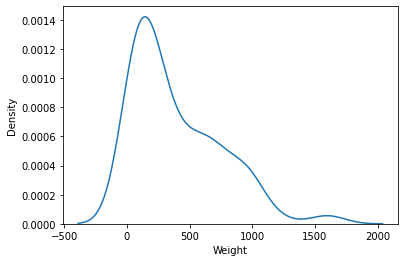

In [388]:
sns.kdeplot(raw_df['Weight'])

In [389]:
q1 = raw_df['Weight'].quantile(0.25)
q2 = raw_df['Weight'].quantile(0.50)
q3 = raw_df['Weight'].quantile(0.75)

IQR = q3 - q1

upper_tail = q3 + 1.5*IQR
lower_tail = q1 - 1.5*IQR

median = raw_df['Weight'].median()

print('q1', q1)
print('q2', q2)
print('q3', q3)
print("Median", median)
print('upper_tail', upper_tail)
print('lower_tail', lower_tail)       

q1 120.0
q2 273.0
q3 650.0
Median 273.0
upper_tail 1445.0
lower_tail -675.0


<AxesSubplot:xlabel='Weight'>

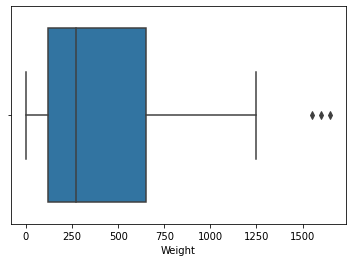

In [390]:
sns.boxplot(raw_df['Weight'])

In [391]:
raw_df[['Weight']].loc[raw_df['Weight'] > upper_tail ]

,Weight
142,1600.0
143,1550.0
144,1650.0


In [392]:
raw_df.loc[raw_df['Weight'] > upper_tail, 'Weight'] = upper_tail
print(raw_df[['Weight']].loc[raw_df['Weight'] > upper_tail ])

Empty DataFrame
Columns: [Weight]
Index: []


<AxesSubplot:xlabel='Weight'>

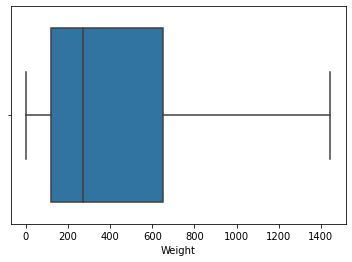

In [393]:
sns.boxplot(raw_df['Weight'])

In [394]:
raw_df['Length1']

0      23.2
1      24.0
2      23.9
3      26.3
4      26.5
       ... 
154    11.5
155    11.7
156    12.1
157    13.2
158    13.8
Name: Length1, Length: 159, dtype: float64

<AxesSubplot:xlabel='Length1', ylabel='Density'>

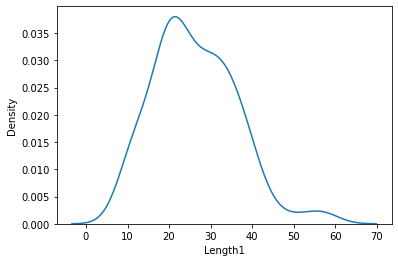

In [395]:
sns.kdeplot(raw_df['Length1'])

<AxesSubplot:xlabel='Length1'>

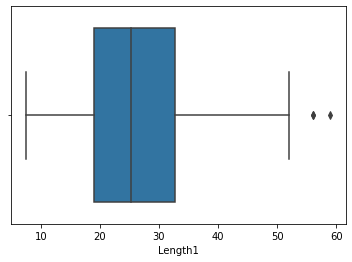

In [396]:
sns.boxplot(raw_df['Length1'])

In [397]:
q1 = raw_df['Length1'].quantile(0.25)
q2 = raw_df['Length1'].quantile(0.50)
q3 = raw_df['Length1'].quantile(0.75)

IQR = q3 - q1

upper_tail = q3 + 1.5*IQR
lower_tail = q1 - 1.5*IQR

median = raw_df['Length1'].median()

print('q1', q1)
print('q2', q2)
print('q3', q3)
print("Median", median)
print('upper_tail', upper_tail)
print('lower_tail', lower_tail) 

q1 19.05
q2 25.2
q3 32.7
Median 25.2
upper_tail 53.175000000000004
lower_tail -1.4250000000000007


In [398]:
raw_df[['Length1']].loc[raw_df['Length1'] > upper_tail]

,Length1
142,56.0
143,56.0
144,59.0


In [399]:
raw_df.loc[raw_df['Length1'] > upper_tail, 'Length1'] = upper_tail
print(raw_df[['Length1']].loc[raw_df['Length1'] > upper_tail ])

Empty DataFrame
Columns: [Length1]
Index: []


In [400]:
raw_df['Length2']

0      25.4
1      26.3
2      26.5
3      29.0
4      29.0
       ... 
154    12.2
155    12.4
156    13.0
157    14.3
158    15.0
Name: Length2, Length: 159, dtype: float64

<AxesSubplot:xlabel='Length2', ylabel='Density'>

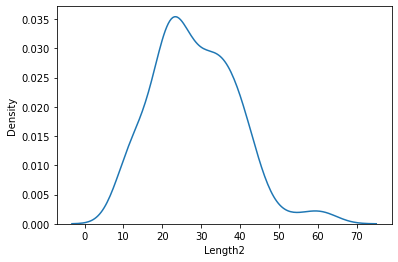

In [401]:
sns.kdeplot(raw_df['Length2'])

<AxesSubplot:xlabel='Length2'>

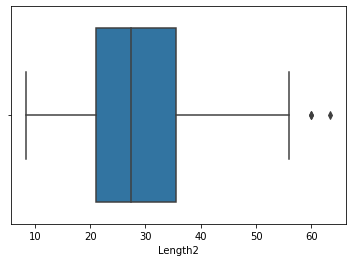

In [402]:
sns.boxplot(raw_df['Length2'])

In [403]:
q1 = raw_df['Length2'].quantile(0.25)
q2 = raw_df['Length2'].quantile(0.50)
q3 = raw_df['Length2'].quantile(0.75)

IQR = q3 - q1

upper_tail = q3 + 1.5*IQR
lower_tail = q1 - 1.5*IQR

median = raw_df['Length2'].median()

print('q1', q1)
print('q2', q2)
print('q3', q3)
print("Median", median)
print('upper_tail', upper_tail)
print('lower_tail', lower_tail) 

q1 21.0
q2 27.3
q3 35.5
Median 27.3
upper_tail 57.25
lower_tail -0.75


In [404]:
raw_df[['Length2']].loc[raw_df['Length2'] > upper_tail]

,Length2
142,60.0
143,60.0
144,63.4


In [405]:
raw_df.loc[raw_df['Length2'] > upper_tail, 'Length2'] = upper_tail
print(raw_df[['Length2']].loc[raw_df['Length2'] > upper_tail ])

Empty DataFrame
Columns: [Length2]
Index: []


In [406]:
raw_df['Length3']

0      30.0
1      31.2
2      31.1
3      33.5
4      34.0
       ... 
154    13.4
155    13.5
156    13.8
157    15.2
158    16.2
Name: Length3, Length: 159, dtype: float64

<AxesSubplot:xlabel='Length3', ylabel='Density'>

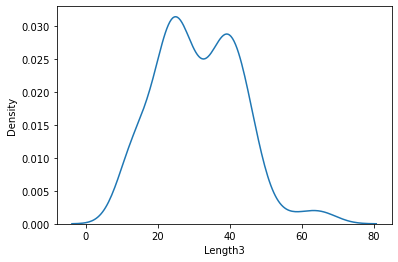

In [407]:
sns.kdeplot(raw_df['Length3'])

<AxesSubplot:xlabel='Length3'>

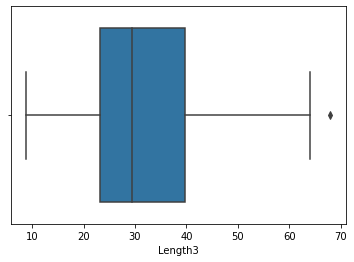

In [408]:
sns.boxplot(raw_df['Length3'])

In [409]:
q1 = raw_df['Length3'].quantile(0.25)
q2 = raw_df['Length3'].quantile(0.50)
q3 = raw_df['Length3'].quantile(0.75)

IQR = q3 - q1

upper_tail = q3 + 1.5*IQR
lower_tail = q1 - 1.5*IQR

median = raw_df['Length3'].median()

print('q1', q1)
print('q2', q2)
print('q3', q3)
print("Median", median)
print('upper_tail', upper_tail)
print('lower_tail', lower_tail) 

q1 23.15
q2 29.4
q3 39.650000000000006
Median 29.4
upper_tail 64.40000000000002
lower_tail -1.600000000000012


In [410]:
raw_df[['Length3']].loc[raw_df['Length3'] > upper_tail]

,Length3
144,68.0


In [411]:
raw_df.loc[raw_df['Length2'] > upper_tail, 'Length2'] = upper_tail
print(raw_df[['Length2']].loc[raw_df['Length2'] > upper_tail ])

Empty DataFrame
Columns: [Length2]
Index: []


In [412]:
raw_df['Width']

0      4.0200
1      4.3056
2      4.6961
3      4.4555
4      5.1340
        ...  
154    1.3936
155    1.2690
156    1.2558
157    2.0672
158    1.8792
Name: Width, Length: 159, dtype: float64

<AxesSubplot:xlabel='Width', ylabel='Density'>

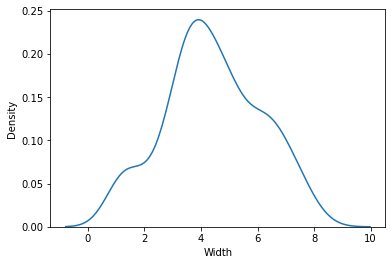

In [413]:
sns.kdeplot(raw_df['Width'])

<AxesSubplot:xlabel='Width'>

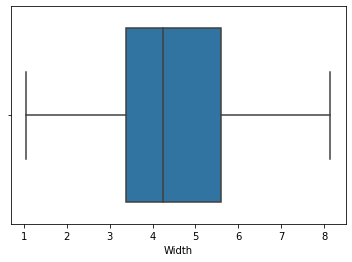

In [414]:
sns.boxplot(raw_df['Width'])

In [415]:
raw_df['Height']

0      11.5200
1      12.4800
2      12.3778
3      12.7300
4      12.4440
        ...   
154     2.0904
155     2.4300
156     2.2770
157     2.8728
158     2.9322
Name: Height, Length: 159, dtype: float64

<AxesSubplot:xlabel='Height', ylabel='Density'>

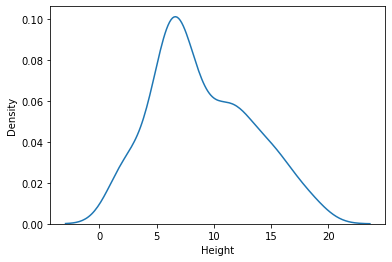

In [416]:
sns.kdeplot(raw_df['Height'])

<AxesSubplot:xlabel='Height'>

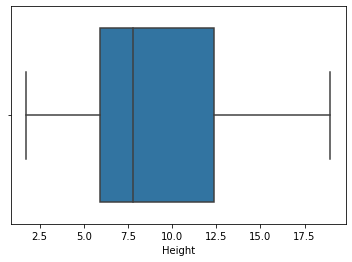

In [417]:
sns.boxplot(raw_df['Height'])

In [418]:
# Train Test Split
x = raw_df.drop('Weight', axis = 1)
y = raw_df['Weight']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 20)

print(x_train.shape)
print(x_test.shape)

(127, 12)
(32, 12)


In [419]:

Linear_reg_wot = LinearRegression()
Linear_reg_wot.fit(x_train, y_train)

LinearRegression()

In [420]:
## Model Evaluation on Testing Data

y_pred = Linear_reg_wot.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error :",mae)

r_squared_value = r2_score(y_test, y_pred)
print("R Squared Value :",r_squared_value)

adj_r2 = 1 - (((1-r_squared_value) * (x_test.shape[0] - 1))/(x_test.shape[0]- x_test.shape[1] - 1))
print("Adjusted R-Squared Value :",adj_r2)

r2 = linear_reg_model.score(x_test, y_test) # Without Predict Function
print("R2 :",r2)

Mean Squared Error : 8979.225168075336
Root Mean Squared Error : 94.7587735678092
Mean Absolute Error : 71.78962664945806
R Squared Value : 0.9325425224137605
Adjusted R-Squared Value : 0.8899377997277145
R2 : 0.9325425224137605


#### Model Evaluation on Training Data

In [421]:
## Model Evaluation on Training Data

y_pred_train = Linear_reg_wot.predict(x_train) # 404 rows

mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error :",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error :",mae)

r_squared_value = r2_score(y_train, y_pred_train)
print("R Squared Value :",r_squared_value)

adj_r2 = 1 - (((1-r_squared_value) * (x_train.shape[0] - 1))/(x_train.shape[0]- x_train.shape[1] - 1))
print("Adjusted R-Squared Value :",adj_r2)

r2 = linear_reg_model.score(x_train, y_train)
print("R2 :",r2)

Mean Squared Error : 6122.032815739935
Root Mean Squared Error : 78.2434202712275
Mean Absolute Error : 59.356455375319925
R Squared Value : 0.9479313399683943
Adjusted R-Squared Value : 0.94245042838612
R2 : 0.9479313399683943


### Ridge Regression with HyperParamer Tuning

In [422]:
ridge_reg_HP = Ridge()
parameters = {'alpha': np.arange(0.01,3,0.01)}
gscv_ridge = GridSearchCV(ridge_reg_HP, parameters, cv= 5)
gscv_ridge.fit(x_train, y_train)
gscv_ridge.best_estimator_

Ridge(alpha=0.6900000000000001)

In [423]:
ridge_reg_HP = Ridge(alpha=0.69)
ridge_reg_HP.fit(x_train,y_train)

Ridge(alpha=0.69)

In [424]:
# Evaluation on test data with ridge reg_HP

y_pred = ridge_reg_HP.predict(x_test)

mse = mean_squared_error(y_test , y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_test , y_pred)
print("MAE:", mae)

r2 = r2_score(y_test , y_pred)
print("R_squared", r2)

MSE: 9484.892017970378
RMSE: 97.39041029778228
MAE: 73.23521418092302
R_squared 0.9287436411568145


In [425]:
# Evaluation on training data ridge reg_HP

y_pred_train = ridge_reg_HP.predict(x_train)

mse = mean_squared_error(y_train , y_pred_train)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_train , y_pred_train)
print("MAE:", mae)

r2 = r2_score(y_train , y_pred_train)
print("R_squared", r2)

MSE: 6268.0109809048145
RMSE: 79.17077100107599
MAE: 60.89172059748585
R_squared 0.946689777290967


## 1.2 Lasso Regression

In [426]:
lasso_reg_HP = Lasso()

param_lasso = {'alpha': np.arange(0.01,3,0.01)}

gscv_lasso = GridSearchCV(lasso_reg_HP, param_lasso, cv = 5)
gscv_lasso.fit(x_train, y_train)
gscv_lasso.best_estimator_

lasso_reg_HP = gscv_lasso.best_estimator_
lasso_reg_HP.fit(x_train, y_train)

Lasso(alpha=0.68)

In [427]:
# Evaluation on test data with lasso reg_HP

y_pred = lasso_reg_HP.predict(x_test)

mse = mean_squared_error(y_test , y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_test , y_pred)
print("MAE:", mae)

r2 = r2_score(y_test , y_pred)
print("R_squared", r2)

MSE: 9065.066914678695
RMSE: 95.21064496514397
MAE: 70.45415159916237
R_squared 0.9318976262685955


In [428]:
# Evaluation on training data lasso reg_HP

y_pred_train = lasso_reg_HP.predict(x_train)

mse = mean_squared_error(y_train , y_pred_train)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_train , y_pred_train)
print("MAE:", mae)

r2 = r2_score(y_train , y_pred_train)
print("R_squared", r2)

MSE: 6214.59782177208
RMSE: 78.83272050216256
MAE: 59.61418636032475
R_squared 0.9471440629355892


## 2 KNN algorithm

In [429]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(x_train, y_train)

KNeighborsRegressor()

In [430]:
# Evaluation on test data with KNN reg

y_pred = knn_reg.predict(x_test)

mse = mean_squared_error(y_test , y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_test , y_pred)
print("MAE:", mae)

r2 = r2_score(y_test , y_pred)
print("R_squared", r2)

MSE: 6704.910787500001
RMSE: 81.88351963307392
MAE: 48.916875000000005
R_squared 0.9496285747712834


In [431]:
# Evaluation on training data KNN reg

y_pred_train = knn_reg.predict(x_train)

mse = mean_squared_error(y_train , y_pred_train)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_train , y_pred_train)
print("MAE:", mae)

r2 = r2_score(y_train , y_pred_train)
print("R_squared", r2)

MSE: 3401.3186488188976
RMSE: 58.320825172650785
MAE: 33.41023622047244
R_squared 0.9710713565714354


### Scaling

In [433]:
nor_scalar = MinMaxScaler()
nor_scalar.fit(x_train) 

array_nor =nor_scalar.transform(x_train)
nor_train_xdf = pd.DataFrame(array_nor, columns = x_train.columns)
nor_train_xdf

,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,0.251779,0.251791,0.243243,0.394861,0.332953,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.295567,0.288639,0.273649,0.279425,0.337488,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.444444,0.442170,0.385135,0.341313,0.551859,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.387521,0.386899,0.336149,0.382398,0.606052,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.391899,0.390993,0.339527,0.308557,0.487159,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
122,0.063492,0.053224,0.054054,0.026553,0.049258,0.0,0.0,0.0,0.0,0.0,1.0,0.0
123,0.755337,0.749232,0.662162,0.303237,0.570294,0.0,0.0,0.0,1.0,0.0,0.0,0.0
124,0.100712,0.094166,0.084459,0.031258,0.030853,0.0,0.0,0.0,0.0,0.0,1.0,0.0
125,0.479475,0.483112,0.479730,0.795623,0.671656,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [434]:
nor_scalar.fit(x_test) 

array_nor_test =nor_scalar.transform(x_test)
nor_test_xdf = pd.DataFrame(array_nor_test, columns = x_test.columns)
nor_test_xdf

,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.359837,0.372990,0.366412,0.443508,0.505205,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.290192,0.300107,0.278626,0.314877,0.431452,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.229832,0.244373,0.227099,0.275657,0.339825,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.694138,0.683816,0.646947,0.320640,0.473376,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.647707,0.651661,0.666031,1.000000,0.746697,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.229832,0.244373,0.227099,0.246088,0.339825,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,1.000000,1.000000,1.000000,0.495222,0.714310,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,0.313407,0.330118,0.326336,0.418494,0.443148,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.390017,0.387996,0.353053,0.368466,0.498599,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## KNN with  Hyperparameter tuning

In [435]:
knn_reg_HP = KNeighborsRegressor()

hyperparameter = {'n_neighbors': np.arange(3,21), 'p': [1,2]}

rscv_knn_reg_nor = RandomizedSearchCV(knn_reg_HP,hyperparameter,cv =5)

rscv_knn_reg_nor.fit(nor_train_xdf, y_train)
rscv_knn_reg_nor.best_estimator_

KNeighborsRegressor(n_neighbors=4)

In [436]:
knn_reg_HP = rscv_knn_reg_nor.best_estimator_
knn_reg_HP.fit(nor_train_xdf, y_train)

KNeighborsRegressor(n_neighbors=4)

In [437]:
# Evaluation on training data KNN reg with HP

y_pred_train = knn_reg_HP.predict(nor_train_xdf)

mse = mean_squared_error(y_train , y_pred_train)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_train , y_pred_train)
print("MAE:", mae)

r2 = r2_score(y_train , y_pred_train)
print("R_squared", r2)

MSE: 4404.7316535433065
RMSE: 66.36815240417128
MAE: 35.662992125984246
R_squared 0.9625372026087256


In [438]:
# Evaluation on test data with KNN reg with HP

y_pred = knn_reg_nor.predict(nor_test_xdf)

mse = mean_squared_error(y_test , y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_test , y_pred)
print("MAE:", mae)

r2 = r2_score(y_test , y_pred)
print("R_squared", r2)

MSE: 9289.471975
RMSE: 96.38190688609559
MAE: 55.9525
R_squared 0.9302117570489792


In [439]:
models = [Linear_reg_woot,Linear_reg_wot,ridge_reg_HP,lasso_reg_HP,knn_reg ,dt_reg,dt_reg_HP,rf_reg,rf_reg_HP]
list_models = ['Linear_reg_woot', 'Linear_reg_wot','ridge_reg_HP','lasso_reg_HP','knn_reg','dt_reg','dt_reg_HP',
               'rf_reg','rf_reg_HP']
accuracy_train = []
accuracy_test = []
# precision_train = []
# precision_test= []

for i in models:
    accuracy = i.score(x_train,y_train)
    accuracy_train.append(accuracy*100)
#     print(accuracy)
    accuracy = i.score(x_test,y_test)
    accuracy_test.append(accuracy*100)
#     print(accuracy)
p1 = pd.Series(accuracy_train,index = list_models)
p2 = pd.Series(accuracy_test,index = list_models)

##### train result

<AxesSubplot:>

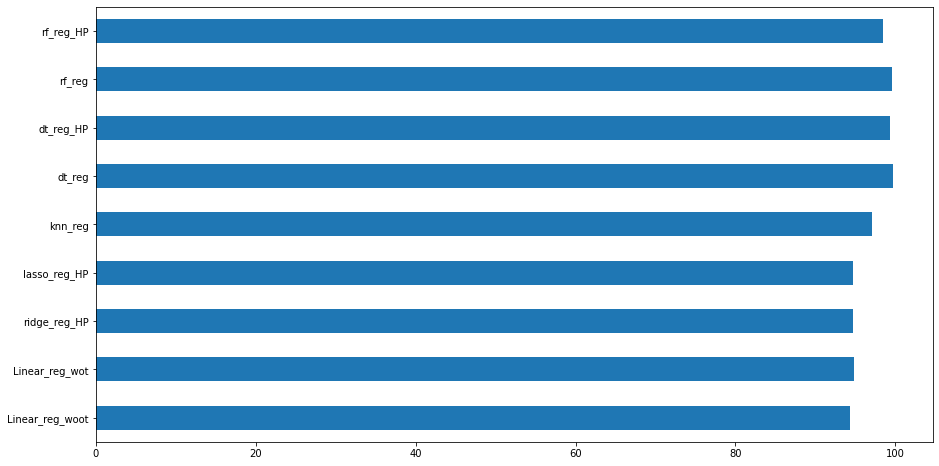

In [440]:
plt.figure(figsize = (15,8))
p1.plot(kind = 'barh')

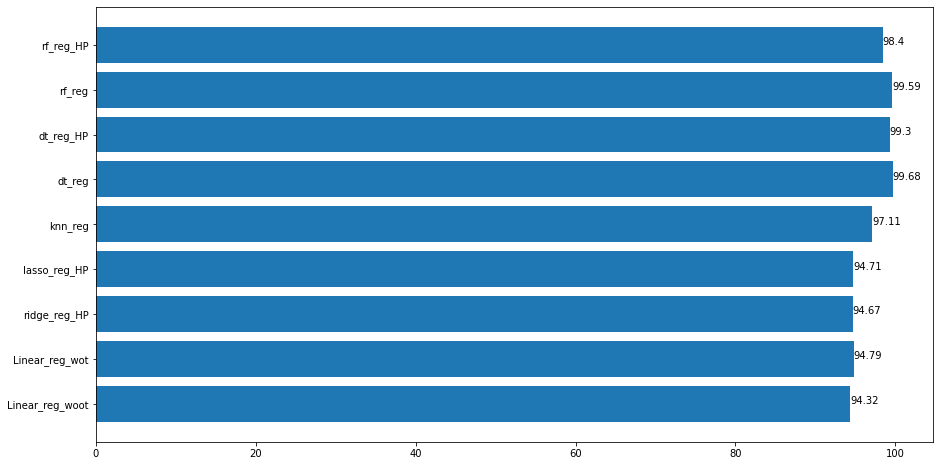

In [441]:
plt.figure(figsize = (15,8))
# plt.bar(list_models,accuracy_train)
plt.barh(list_models, accuracy_train)
for index, value in enumerate(accuracy_train):
    plt.text(value, index, str((round(value, 2))))
plt.show()

##### test result

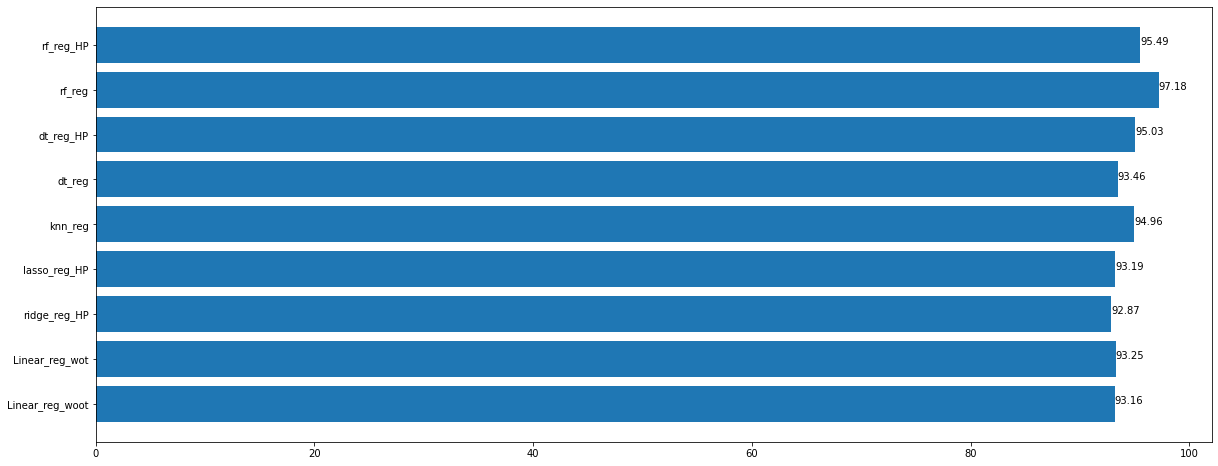

In [442]:
plt.figure(figsize = (20,8))
plt.barh(list_models, accuracy_test)
for index, value in enumerate(accuracy_test):
    plt.text(value, index, str((round(value, 2))))
plt.show()

# The best accuracy for this dataset is given by Random forest with hyperparameter tunning followed by Descision tree ( both with & without hyperparameter tunning)

# Testing on Single Row

In [443]:
x.head(1).T

,0
Length1,23.20
Length2,25.40
Length3,30.00
Height,11.52
Width,4.02
Species_Bream,1.00
Species_Parkki,0.00
Species_Perch,0.00
Species_Pike,0.00
Species_Roach,0.00


In [444]:
Length1 = 23.20
Length2 = 25.40
Length3 = 30.00
Height = 11.52
Width = 4.02
Species = 'Parkki'


# Weight = ?

In [445]:
project_data = {'columns' : list(x.columns)}

In [446]:
column_names = x.columns
column_names

Index(['Length1', 'Length2', 'Length3', 'Height', 'Width', 'Species_Bream',
       'Species_Parkki', 'Species_Perch', 'Species_Pike', 'Species_Roach',
       'Species_Smelt', 'Species_Whitefish'],
      dtype='object')

In [447]:
Species =  'Species_' + Species
Species_index = np.where(column_names == Species)

In [448]:
test_array = np.zeros(x.shape[1])
test_array[0] = Length1
test_array[1] = Length2
test_array[2] = Length3
test_array[3] = Height
test_array[4] = Width
test_array[Species_index] = 1

test_array

array([23.2 , 25.4 , 30.  , 11.52,  4.02,  0.  ,  1.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ])

In [449]:
linear_reg_model.predict([test_array])

array([488.39533759])

In [450]:
with open ('Linear_Model.pkl','wb') as f:
    pickle.dump(linear_reg_model,f)
    
with open ('project_data.json','w') as f:
    json.dump(project_data,f)